In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import yfinance as yf

In [14]:
start = datetime.datetime(2020, 11, 1)
end = datetime.datetime(2023, 11,1)

df = yf.download('CHRW', start , end)

[*********************100%%**********************]  1 of 1 completed


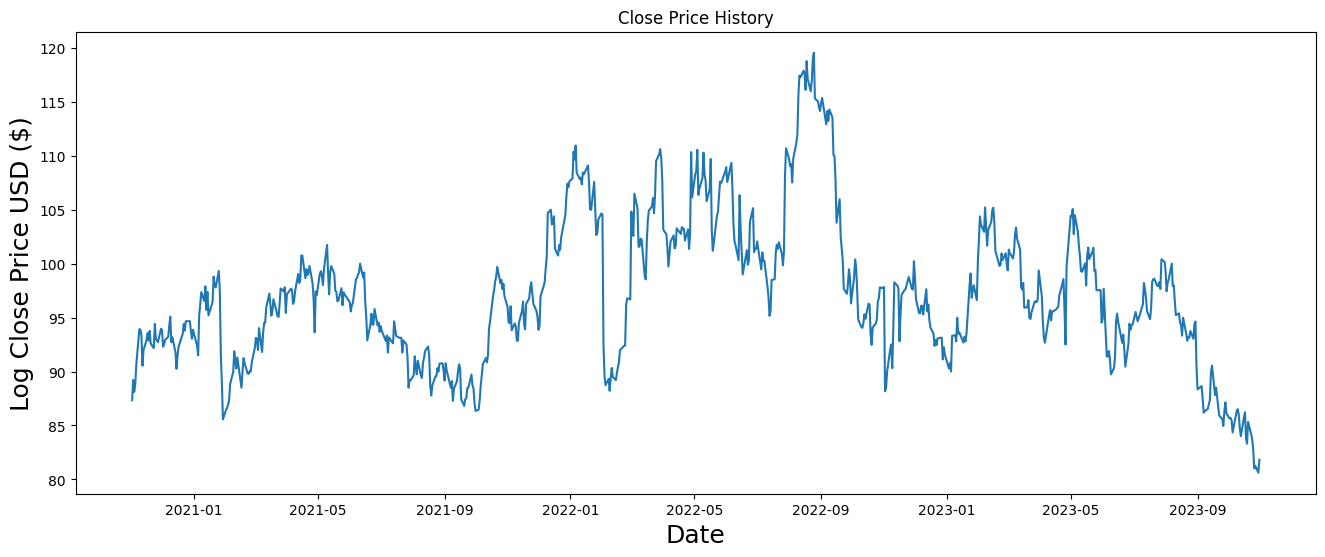

In [15]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
df.filter(['Close']).values

array([[ 87.33999634],
       [ 89.22000122],
       [ 88.11000061],
       [ 88.80000305],
       [ 90.62000275],
       [ 93.91999817],
       [ 93.88999939],
       [ 93.33000183],
       [ 90.54000092],
       [ 91.97000122],
       [ 92.91999817],
       [ 93.55000305],
       [ 92.87999725],
       [ 93.76999664],
       [ 92.58999634],
       [ 92.16999817],
       [ 94.41999817],
       [ 93.02999878],
       [ 92.72000122],
       [ 93.97000122],
       [ 93.83000183],
       [ 92.30000305],
       [ 92.52999878],
       [ 92.93000031],
       [ 93.22000122],
       [ 94.27999878],
       [ 95.08000183],
       [ 92.72000122],
       [ 93.16999817],
       [ 91.77999878],
       [ 90.25      ],
       [ 91.44000244],
       [ 92.29000092],
       [ 92.59999847],
       [ 93.48000336],
       [ 94.38999939],
       [ 93.79000092],
       [ 94.66000366],
       [ 94.66999817],
       [ 93.72000122],
       [ 93.04000092],
       [ 93.87000275],
       [ 92.37000275],
       [ 91

In [17]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

604

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.17261735],
       [0.22090928],
       [0.19239655],
       [0.21012074],
       [0.25687131],
       [0.34163872],
       [0.34086814],
       [0.32648341],
       [0.25481629],
       [0.29154889],
       [0.31595159],
       [0.33213461],
       [0.31492408],
       [0.33778561],
       [0.30747479],
       [0.29668624],
       [0.35448228],
       [0.31877719],
       [0.31081424],
       [0.34292315],
       [0.33932697],
       [0.30002569],
       [0.30593362],
       [0.31620851],
       [0.32365781],
       [0.3508861 ],
       [0.37143588],
       [0.31081424],
       [0.32237337],
       [0.28666827],
       [0.247367  ],
       [0.27793474],
       [0.29976877],
       [0.30773171],
       [0.33033651],
       [0.3537117 ],
       [0.33829946],
       [0.36064734],
       [0.36090407],
       [0.33650137],
       [0.31903411],
       [0.34035448],
       [0.30182378],
       [0.27947591],
       [0.37554572],
       [0.39917803],
       [0.43000251],
       [0.408

In [19]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(15, len(train_data)):
    x_train.append(train_data[i-15:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 16:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.17261735, 0.22090928, 0.19239655, 0.21012074, 0.25687131,
       0.34163872, 0.34086814, 0.32648341, 0.25481629, 0.29154889,
       0.31595159, 0.33213461, 0.31492408, 0.33778561, 0.30747479])]
[0.29668624022147005]

[array([0.17261735, 0.22090928, 0.19239655, 0.21012074, 0.25687131,
       0.34163872, 0.34086814, 0.32648341, 0.25481629, 0.29154889,
       0.31595159, 0.33213461, 0.31492408, 0.33778561, 0.30747479]), array([0.22090928, 0.19239655, 0.21012074, 0.25687131, 0.34163872,
       0.34086814, 0.32648341, 0.25481629, 0.29154889, 0.31595159,
       0.33213461, 0.31492408, 0.33778561, 0.30747479, 0.29668624])]
[0.29668624022147005, 0.3544822839502664]



In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm = model.fit(x_train, y_train, batch_size=128, epochs=100)
lstm

Epoch 1/100
5/5 [==============================] - 6s 72ms/step - loss: 0.0919
Epoch 2/100
5/5 [==============================] - 0s 73ms/step - loss: 0.0354
Epoch 3/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0201
Epoch 4/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0171
Epoch 5/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0137
Epoch 6/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0118
Epoch 7/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0116
Epoch 8/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0106
Epoch 9/100
5/5 [==============================] - 0s 75ms/step - loss: 0.0101
Epoch 10/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0092
Epoch 11/100
5/5 [==============================] - 0s 79ms/step - loss: 0.0093
Epoch 12/100
5/5 [==============================] - 0s 72ms/step - loss: 0.0085
Epoch 13/100
5/5 [==============================]

In [21]:
# Create the testing data set
test_data = scaled_data[training_data_len - 15: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(15, len(test_data)):
    x_test.append(test_data[i-15:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 14ms/step


2.0877093707457814

<ipython-input-29-2dc96bd6ea05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


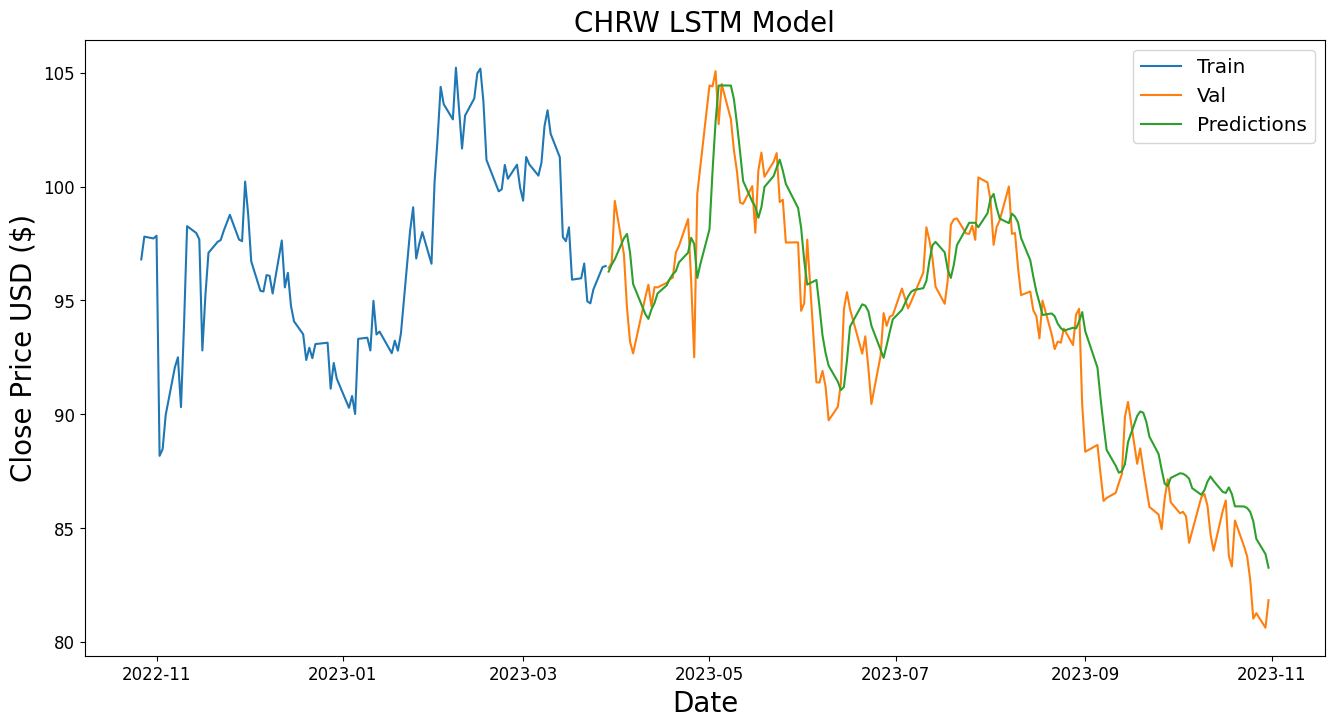

In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('CHRW LSTM Model',fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(train['Close'][500:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right',fontsize = 'x-large')
plt.show()

Text(0, 0.5, 'MSE')

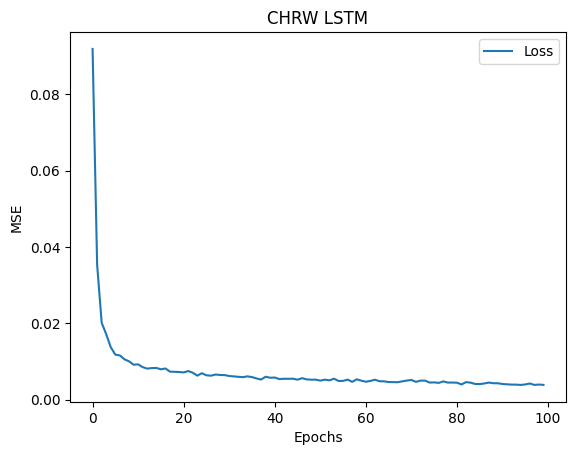

In [23]:
plt.plot(lstm.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('CHRW LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 15, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117